In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Softmax

In [4]:
# activation at last layer of NN
a = np.random.randn(5)
expa = np.exp(a)
softmax = expa / expa.sum()

In [6]:
# probabilities should add up to 1
softmax.sum()

0.99999999999999989

In [18]:
# Matrix
A = np.random.randn(100, 5) # 100 samples in 5 classes
expA = np.exp(A) # all positive
# we want each row to sum up to 1
# softmax = expA / expA.sum(axis=1) cannot be broadcasted -> div 1-D array by 2-D array
softmax = expA / expA.sum(axis=1, keepdims=True) 

# sanity check
print(softmax.sum(axis=1))
print(expA.sum(axis=1).shape)
print(expA.sum(axis=1, keepdims=True).shape)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
(100,)
(100, 1)


# Building a Feedforward Neural Network

In [85]:
def sigmoid(a):
    return 1.0 / ( 1.0 + np.exp(-a))

def softmax(a):                                                                 
    expA = np.exp(a)                                                            
    return expA / expA.sum(axis=1, keepdims=True)
                  
def forward(X, W1, b1, W2, b2):
    """ Sigmoid non-linearity in Hidden layers. """
    # value at the hidden layer
    #Z = sigmoid( X.dot(W1)+b1 )
    Z = np.tanh( X.dot(W1)+b1 )
    # softmax at the next layer
    Y = softmax( Z.dot(W2)+b2 )
    return Y

def classification_rate(target_labels, predicted_labels):
    return np.mean(target_labels==predicted_labels)

def scatter(x, y):
    plt.scatter(x[:,0], x[:,1], c=y, s=100, alpha=0.5)
    plt.show();

In [86]:
Nclass = 500 # 500 samples per class
D = 2 # dimensions
M = 3 # Number of Hidden layers
K = 3 # number of classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

# 3 gaussian clouds
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

# create labels
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

Classification rate for randomly chosen weights: 0.335333333333


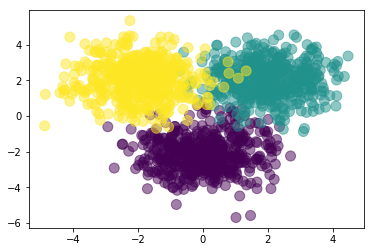

In [87]:
P_Y_given_X = forward(X, W1, b1, W2, b2)                                        
P = np.argmax(P_Y_given_X, axis=1)                                                                                                     
    
# can you explain why the answer should be close to 1/3?
print( "Classification rate for randomly chosen weights:", classification_rate(Y, P) )
scatter(X,Y)

## Example

In [88]:
def get_data(df):                                                                                                            
    data = df.as_matrix()                                                       
                                                                                
    X = data[:,:-1]                                                             
    Y = data[:,-1]                                                              
                                                                                
    # normalize columns 1 and 2                                                 
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()                            
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()                            
                                                                                
    # create a new matrix X2 with the correct number of columns      
    # we want to work on the categorical column time_of_day, X[4]
    # D+3 because there are 4 diff. categorical values
    N, D = X.shape                                                              
    X2 = np.zeros((N, D+3))                                                     
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical                              
                                                                                
    # one-hot encoding for other 4 columns                                                                
    for n in range(N):                                                         
        t = int(X[n,D-1]) # get time of day                                                       
        X2[n,t+D-1] = 1                                                         
                                                                                
    # method 2                                                                  
    # Z = np.zeros((N, 4))                                                      
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1                            
    # # assign: X2[:,-4:] = Z                                                   
    # assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)                              
                                                                                
    return X2, Y                                                                
                                                                                
                                                                                
def get_binary_data(df):                                                          
    # return only the data from the first 2 classes                             
    X, Y = get_data(df)                                                           
    X2 = X[Y <= 1]                                                              
    Y2 = Y[Y <= 1]                                                              
    return X2, Y2    

In [89]:
filename= 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ann_logistic_extra/ecommerce_data.csv'

df = pd.read_csv(filename)
df.head(3)

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0


In [93]:
X, Y = get_data(df)

D = X.shape[1] # dimensions
M = 5 # Number of Hidden layers
K = len(set(Y)) # number of classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

P_Y_given_X = forward(X, W1, b1, W2, b2)                                        
P = np.argmax(P_Y_given_X, axis=1)                                                                                                     
    
# can you explain why the answer should be close to 1/3?
print( "Classification rate for randomly chosen weights:", classification_rate(Y, P) )

Classification rate for randomly chosen weights: 0.388
